# Google stock price prediction - 2017

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#import training set
dataset_train = pd.read_csv(r'C:\Users\Krishi Thiruppathi\Desktop\Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [6]:
training_set=dataset_train.iloc[:, 1:2].values
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
# Feature Scaling - in this case, normalization is advisable
#Xnorm=X-min(X)/max(X)-min(X)
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

### Creating a data structure with 60 timestamps and 1 output

In [13]:
# since 20 working days in a month, the output will be predicted on the stock prices of past 3 months
X_train=[] #input list to contain 60 prev stock prices
y_train=[] # 1 output list
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0]) #0-59
    y_train.append(training_set_scaled[i,0])
# make them numpy arrays for rnn
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
y_train

array([0.08627874, 0.08471612, 0.07454052, ..., 0.95725128, 0.93796041,
       0.93688146])

In [21]:
# reshaping
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1)) 
# 3D-(rows-no. of stock prices,cols-no. of timestamps,no. of predictions)
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

### Building a RNN

In [22]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [23]:
regressor = Sequential() # continuous values-regression

In [25]:
# First LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True, input_shape= (X_train.shape[1],1))) # return_sequences is True due to stacked LSTM
regressor.add(Dropout(0.2)) #Dropout rate- rate of neurons to be dropped the the layers

In [26]:
# Second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))

In [27]:
# Third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences=True)) 
regressor.add(Dropout(0.2))

In [28]:
# Fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50)) 
regressor.add(Dropout(0.2))

##### Adding the output layer

In [29]:
regressor.add(Dense(units=1))

In [30]:
# compiling the rnn
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Training the RNN

In [31]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 11s 120ms/step - loss: 0.0361
Epoch 2/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0070
Epoch 3/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0074
Epoch 4/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0057
Epoch 5/100
38/38 [==============================] - 5s 123ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 4s 118ms/step - loss: 0.0052
Epoch 7/100
38/38 [==============================] - 5s 119ms/step - loss: 0.0054
Epoch 8/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0054
Epoch 9/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0057
Epoch 10/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 5s 122ms/step - loss: 0.0043
Epoch 12/100
38/38 [==============================] - 5s 120ms/step - loss: 0.0045
Epoch 13/100

### Making the predictions and visualizing the results

##### Getting real stock price of 2017 (one month)

In [32]:
dataset_test = pd.read_csv(r'C:\Users\Krishi Thiruppathi\Desktop\Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values

In [33]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

##### Getting predicted stock price of 2017 (one month)

In [ ]:
'''To get the predicted output of (T+1)th day, we must have the stock price of T working days(i.e 60). 
Hence we must concatenate the original training and test set (and then scale them) since its continuous data.  '''

In [34]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis=0)

In [37]:
# to get lower bound, we subtract test data from total and subtract 60, upper bound is naturally the last value before prediction
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [38]:
X_test=[] 
for i in range(60,80): #test set-60+20
    X_test.append(inputs[i-60:i,0]) 
X_test = np.array(X_test)
# reshaping
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1)) 
# 3D-(rows-no. of stock prices,cols-no. of timestamps,no. of predictions)

In [43]:
predicted_stock_price = regressor.predict(X_test)
# inverse the scaling to get original prices
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 41ms/step


In [44]:
predicted_stock_price

array([[785.02905],
       [782.3211 ],
       [785.6289 ],
       [787.92474],
       [791.59796],
       [798.32715],
       [801.8398 ],
       [800.0862 ],
       [798.9403 ],
       [799.5806 ],
       [800.58795],
       [800.85223],
       [800.8396 ],
       [802.00806],
       [803.27625],
       [810.7782 ],
       [818.7599 ],
       [824.5086 ],
       [823.9017 ],
       [812.8783 ]], dtype=float32)

##### Visualizing the results

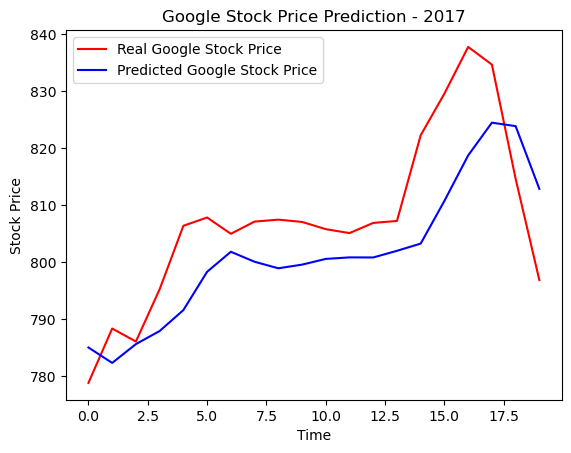

In [45]:
plt.plot(real_stock_price, color='red', label='Real Google Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction - 2017')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()